# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [1]:
import pandas as pd

# Leer el CSV con separador ';'
ds = pd.read_csv('assets/real_estate.csv', sep=';')

# Vista rápida
print(ds.head())      # primeras 5 filas
# (opcional) más contexto:
# print(ds.shape)     # filas, columnas
# print(ds.columns)   # nombres de columnas

   Unnamed: 0  id_realEstates  isNew                    realEstate_name  \
0           1       153771986  False            ferrari 57 inmobiliaria   
1           2       153867863  False  tecnocasa fuenlabrada ferrocarril   
2           3       153430440  False                 look find boadilla   
3           4       152776331  False  tecnocasa fuenlabrada ferrocarril   
4           5       153180188  False            ferrari 57 inmobiliaria   

   phone_realEstate                                       url_inmueble  rooms  \
0       912177526.0  https://www.fotocasa.es/es/comprar/vivienda/ma...    3.0   
1       916358736.0  https://www.fotocasa.es/es/comprar/vivienda/ma...    3.0   
2       916350408.0  https://www.fotocasa.es/es/comprar/vivienda/ma...    2.0   
3       916358736.0  https://www.fotocasa.es/es/comprar/vivienda/ma...    3.0   
4       912177526.0  https://www.fotocasa.es/es/comprar/vivienda/ma...    2.0   

   bathrooms  surface   price  ... level4Id level5Id level6Id 

#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [2]:
import pandas as pd
import re

ds = pd.read_csv('assets/real_estate.csv', sep=';')
precio_raw = ds['price'].astype(str)
precio_num = (
    precio_raw.str.extract(r'([\d\.,]+)', expand=False)
              .str.replace('.', '', regex=False)
              .str.replace(',', '.', regex=False)
)
ds['price_num'] = pd.to_numeric(precio_num, errors='coerce')
idx_max = ds['price_num'].idxmax()
fila = ds.loc[idx_max]
candidatas_dir = [
    'address', 'direccion', 'street', 'location', 'title',
    'realEstate_name', 'name', 'neighborhood', 'district', 'zone', 'city'
]
col_dir = next((c for c in candidatas_dir if c in ds.columns), None)
direccion = fila[col_dir] if col_dir else '(sin dirección disponible)'
precio = int(fila['price_num']) if pd.notnull(fila['price_num']) else fila['price']
print("La casa con dirección en " + str(direccion) +
      " es la más cara y su precio es de " + str(precio) + " €")


La casa con dirección en El Escorial es la más cara y su precio es de 8500000 €


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [3]:
import pandas as pd
import re

ds = pd.read_csv('assets/real_estate.csv', sep=';')
precio_raw = ds['price'].astype(str)
precio_num = (
    precio_raw.str.extract(r'([\d\.,]+)', expand=False)
              .str.replace('.', '', regex=False)
              .str.replace(',', '.', regex=False)
)
ds['price_num'] = pd.to_numeric(precio_num, errors='coerce')
idx_min = ds['price_num'].idxmin()
fila = ds.loc[idx_min]
candidatas_dir = [
    'address', 'direccion', 'street', 'location', 'title',
    'realEstate_name', 'name', 'neighborhood', 'district', 'zone', 'city'
]
col_dir = next((c for c in candidatas_dir if c in ds.columns), None)
direccion = fila[col_dir] if col_dir else '(sin dirección disponible)'
precio = int(fila['price_num']) if pd.notnull(fila['price_num']) else fila['price']
print("La casa con dirección en " + str(direccion) +
      " es la más barata y su precio es de " + str(precio) + " €")


La casa con dirección en Parla es la más barata y su precio es de 0 €


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [4]:
import pandas as pd
import re

ds = pd.read_csv('assets/real_estate.csv', sep=';')

sup_raw = ds['surface'].astype(str)
sup_num = (
    sup_raw.str.extract(r'([\d\.,]+)', expand=False)
           .str.replace('.', '', regex=False)
           .str.replace(',', '.', regex=False)
)
ds['surface_num'] = pd.to_numeric(sup_num, errors='coerce')

idx_max = ds['surface_num'].idxmax()
idx_min = ds['surface_num'].idxmin()

fila_max = ds.loc[idx_max]
fila_min = ds.loc[idx_min]

candidatas_dir = [
    'address', 'direccion', 'street', 'location', 'title',
    'realEstate_name', 'name', 'neighborhood', 'district', 'zone', 'city'
]
col_dir = next((c for c in candidatas_dir if c in ds.columns), None)

direccion_max = fila_max[col_dir] if col_dir else '(sin dirección disponible)'
direccion_min = fila_min[col_dir] if col_dir else '(sin dirección disponible)'

superficie_max = int(fila_max['surface_num']) if pd.notnull(fila_max['surface_num']) else fila_max['surface']
superficie_min = int(fila_min['surface_num']) if pd.notnull(fila_min['surface_num']) else fila_min['surface']

print("La casa más grande está ubicada en " + str(direccion_max) +
      " y su superficie es de " + str(superficie_max) + " metros")

print("La casa más pequeña está ubicada en " + str(direccion_min) +
      " y su superficie es de " + str(superficie_min) + " metros")


La casa más grande está ubicada en Sevilla la Nueva y su superficie es de 2490000 metros
La casa más pequeña está ubicada en Calle Amparo,  Madrid Capital y su superficie es de 150 metros


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [5]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
populations = ds['level5'].dropna().unique()
print(", ".join(populations))


Arganda del Rey, Fuenlabrada, Boadilla del Monte, Las Rozas de Madrid,  Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes, Rivas-vaciamadrid, Alpedrete, Móstoles, San Fernando de Henares, Coslada, Becerril de la Sierra, Alcalá de Henares, Chinchón, Parla, Alcorcón, El Escorial, Leganés, Pedrezuela, Majadahonda, Villanueva de la Cañada, Villanueva del Pardillo, Torrelodones, Moralzarzal, Mejorada del Campo, Aranjuez, Corpa, Getafe, Velilla de San Antonio, Sevilla la Nueva, San Martín de la Vega, Villalbilla, Collado Villalba, Alcobendas, El Molar (Madrid), Moraleja de Enmedio, Algete, Campo Real, Torrejón de la Calzada, Colmenar Viejo, Valdemorillo, Fuente El Saz de Jarama, Tres Cantos, Arroyomolinos (Madrid), Griñón, Paracuellos de Jarama, Guadarrama, Titulcia, Galapagar, Collado Mediano, Los Molinos, San Lorenzo de El Escorial, Loeches, San Martín de Valdeiglesias, Navas del Rey, Busta

#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [6]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
has_na = ds.isna().values.any()
print(has_na)
if has_na:
    print(ds.isna().sum()[ds.isna().sum() > 0])
# TODO

True
realEstate_name        10
phone_realEstate      794
rooms                 353
bathrooms             345
surface              1250
description           142
level4               6643
level6              14627
level7               2277
level8               8579
zipCode             15335
customZone          15335
dtype: int64


#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [7]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
print(ds.shape)
ds = ds.dropna()
print(ds.shape)


(15335, 37)
(0, 37)


#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [8]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
precio_raw = ds['price'].astype(str)
precio_num = (precio_raw.str.extract(r'([\d\.,]+)', expand=False)
                         .str.replace('.', '', regex=False)
                         .str.replace(',', '.', regex=False))
ds['price_num'] = pd.to_numeric(precio_num, errors='coerce')
madrid = ds[ds['level5'] == 'Arroyomolinos (Madrid)']
print(madrid['price_num'].mean())


294541.59854014596


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


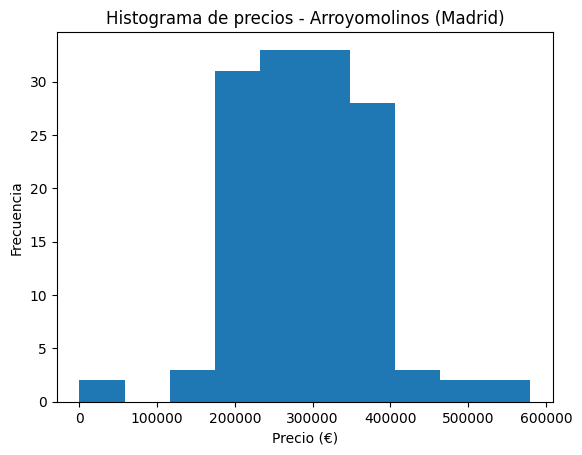

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

ds = pd.read_csv('assets/real_estate.csv', sep=';')
precio_raw = ds['price'].astype(str)
precio_num = (precio_raw.str.extract(r'([\d\.,]+)', expand=False)
                         .str.replace('.', '', regex=False)
                         .str.replace(',', '.', regex=False))
ds['price_num'] = pd.to_numeric(precio_num, errors='coerce')
madrid = ds[ds['level5'] == 'Arroyomolinos (Madrid)']['price_num'].dropna()
plt.hist(madrid)
plt.title('Histograma de precios - Arroyomolinos (Madrid)')
plt.xlabel('Precio (€)')
plt.ylabel('Frecuencia')
plt.show()


**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [10]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
precio_raw = ds['price'].astype(str)
precio_num = (precio_raw.str.extract(r'([\d\.,]+)', expand=False)
                         .str.replace('.', '', regex=False)
                         .str.replace(',', '.', regex=False))
ds['price_num'] = pd.to_numeric(precio_num, errors='coerce')
valde = ds[ds['level5'].astype(str).str.contains('Valdemorillo', na=False)]['price_num'].mean()
gala = ds[ds['level5'].astype(str).str.contains('Galapagar', na=False)]['price_num'].mean()
print("Media Valdemorillo: " + str(valde))
print("Media Galapagar: " + str(gala))
conclusion = "Iguales"
if pd.notnull(valde) and pd.notnull(gala):
    if valde > gala:
        conclusion = "Valdemorillo > Galapagar"
    elif gala > valde:
        conclusion = "Galapagar > Valdemorillo"
print("Conclusión: " + conclusion)


Media Valdemorillo: 363860.2931034483
Media Galapagar: 360063.20238095237
Conclusión: Valdemorillo > Galapagar


#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [11]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
precio_raw = ds['price'].astype(str)
precio_num = (precio_raw.str.extract(r'([\d\.,]+)', expand=False)
                         .str.replace('.', '', regex=False)
                         .str.replace(',', '.', regex=False))
ds['price_num'] = pd.to_numeric(precio_num, errors='coerce')
sup_raw = ds['surface'].astype(str)
sup_num = (sup_raw.str.extract(r'([\d\.,]+)', expand=False)
                     .str.replace('.', '', regex=False)
                     .str.replace(',', '.', regex=False))
ds['surface_num'] = pd.to_numeric(sup_num, errors='coerce')
ds['pps'] = ds['price_num'] / ds['surface_num']
valde = ds[ds['level5'].astype(str).str.contains('Valdemorillo', na=False)]['pps'].mean()
gala = ds[ds['level5'].astype(str).str.contains('Galapagar', na=False)]['pps'].mean()
print("Precio/m2 Valdemorillo: " + str(valde))
print("Precio/m2 Galapagar: " + str(gala))
conclusion = "Iguales"
if pd.notnull(valde) and pd.notnull(gala):
    if valde > gala:
        conclusion = "Valdemorillo > Galapagar"
    elif gala > valde:
        conclusion = "Galapagar > Valdemorillo"
print("Conclusión: " + conclusion)


Precio/m2 Valdemorillo: 131.79502109024983
Precio/m2 Galapagar: 160.63240303094022
Conclusión: Galapagar > Valdemorillo


#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

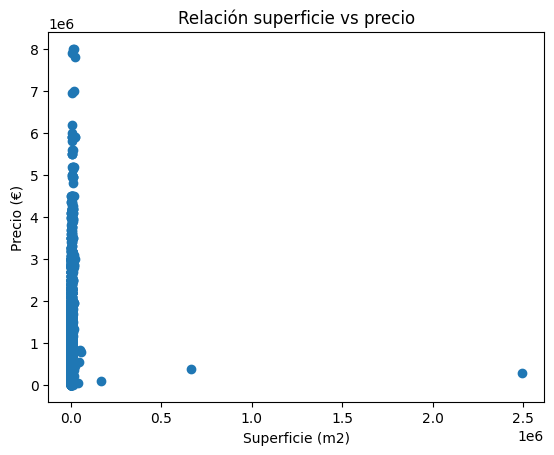

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

ds = pd.read_csv('assets/real_estate.csv', sep=';')
precio_raw = ds['price'].astype(str)
precio_num = (precio_raw.str.extract(r'([\d\.,]+)', expand=False)
                         .str.replace('.', '', regex=False)
                         .str.replace(',', '.', regex=False))
ds['price_num'] = pd.to_numeric(precio_num, errors='coerce')
sup_raw = ds['surface'].astype(str)
sup_num = (sup_raw.str.extract(r'([\d\.,]+)', expand=False)
                     .str.replace('.', '', regex=False)
                     .str.replace(',', '.', regex=False))
ds['surface_num'] = pd.to_numeric(sup_num, errors='coerce')
tmp = ds[['surface_num', 'price_num']].dropna()
plt.scatter(tmp['surface_num'], tmp['price_num'])
plt.title('Relación superficie vs precio')
plt.xlabel('Superficie (m2)')
plt.ylabel('Precio (€)')
plt.show()


**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [13]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
print(ds['realEstate_name'].dropna().nunique())


1821


#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [14]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
conteo = ds.groupby('level5').size().sort_values(ascending=False)
top = conteo.index[0]
num = int(conteo.iloc[0])
print(top + " " + str(num))


 Madrid Capital 6643


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [15]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
sur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
df_sur = ds[ds['level5'].isin(sur)]
print(df_sur)


       Unnamed: 0  id_realEstates  isNew  \
1               2       153867863  False   
3               4       152776331  False   
85             86       153152077  False   
94             95       153995577  False   
109           110       153586414  False   
...           ...             ...    ...   
15275       15276       153903887  False   
15291       15292       151697757  False   
15305       15306       153902389  False   
15322       15323       153871864  False   
15325       15326       153901467  False   

                                 realEstate_name  phone_realEstate  \
1              tecnocasa fuenlabrada ferrocarril       916358736.0   
3              tecnocasa fuenlabrada ferrocarril       916358736.0   
85                       sinergical inmobiliaria               NaN   
94                               viviendas365com       911226014.0   
109              area uno asesores inmobiliarios       912664081.0   
...                                          ...   

#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

C:\Users\Mati\AppData\Local\Temp\ipykernel_5304\4245198853.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sur['price_num'] = pd.to_numeric(precio_num, errors='coerce')


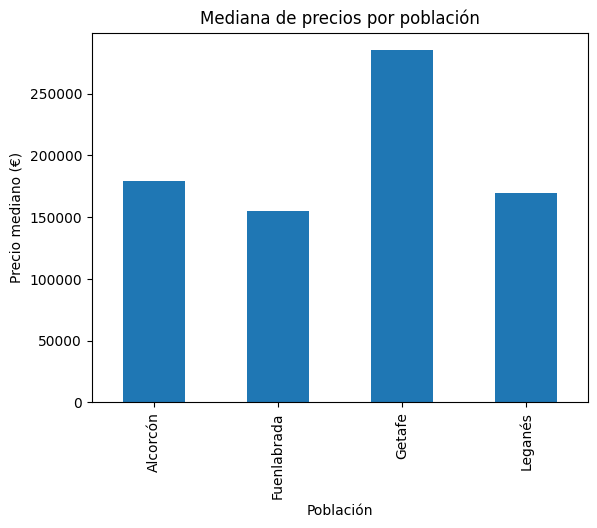

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

ds = pd.read_csv('assets/real_estate.csv', sep=';')
sur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
df_sur = ds[ds['level5'].isin(sur)]
precio_raw = df_sur['price'].astype(str)
precio_num = (precio_raw.str.extract(r'([\d\.,]+)', expand=False)
                         .str.replace('.', '', regex=False)
                         .str.replace(',', '.', regex=False))
df_sur['price_num'] = pd.to_numeric(precio_num, errors='coerce')
median_prices = df_sur.groupby('level5')['price_num'].median()
median_prices.plot(kind='bar', title='Mediana de precios por población')
plt.xlabel('Población')
plt.ylabel('Precio mediano (€)')
plt.show()


**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [17]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
sur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
df_sur = ds[ds['level5'].isin(sur)]
precio_raw = df_sur['price'].astype(str)
precio_num = (precio_raw.str.extract(r'([\d\.,]+)', expand=False)
                         .str.replace('.', '', regex=False)
                         .str.replace(',', '.', regex=False))
df_sur['price_num'] = pd.to_numeric(precio_num, errors='coerce')
sup_raw = df_sur['surface'].astype(str)
sup_num = (sup_raw.str.extract(r'([\d\.,]+)', expand=False)
                     .str.replace('.', '', regex=False)
                     .str.replace(',', '.', regex=False))
df_sur['surface_num'] = pd.to_numeric(sup_num, errors='coerce')
for col in ['price_num', 'rooms', 'surface_num', 'bathrooms']:
    print(col + ": media = " + str(df_sur[col].mean()) + ", varianza = " + str(df_sur[col].var()))

price_num: media = 223094.48070562293, varianza = 14921367508.04902
rooms: media = 3.0177383592017737, varianza = 0.7188858892927542
surface_num: media = 1117.5222363405337, varianza = 426305.17603163363
bathrooms: media = 1.633221850613155, varianza = 0.5717968625577321


C:\Users\Mati\AppData\Local\Temp\ipykernel_5304\312813908.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sur['price_num'] = pd.to_numeric(precio_num, errors='coerce')
C:\Users\Mati\AppData\Local\Temp\ipykernel_5304\312813908.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sur['surface_num'] = pd.to_numeric(sup_num, errors='coerce')


#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [18]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
sur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
df_sur = ds[ds['level5'].isin(sur)]
precio_raw = df_sur['price'].astype(str)
precio_num = (precio_raw.str.extract(r'([\d\.,]+)', expand=False)
                         .str.replace('.', '', regex=False)
                         .str.replace(',', '.', regex=False))
df_sur['price_num'] = pd.to_numeric(precio_num, errors='coerce')
idx = df_sur.groupby('level5')['price_num'].idxmax()
result = df_sur.loc[idx, ['level5', 'price_num', 'address']]
print(result)


            level5  price_num                                address
5585      Alcorcón     950000                               Alcorcón
11561  Fuenlabrada     490000  Calle de Paulo Freire, 5, Fuenlabrada
2881        Getafe    1050000                                 Getafe
10412      Leganés     650000           Avenida Reina Sofía, Leganés


C:\Users\Mati\AppData\Local\Temp\ipykernel_5304\2507112199.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sur['price_num'] = pd.to_numeric(precio_num, errors='coerce')


#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

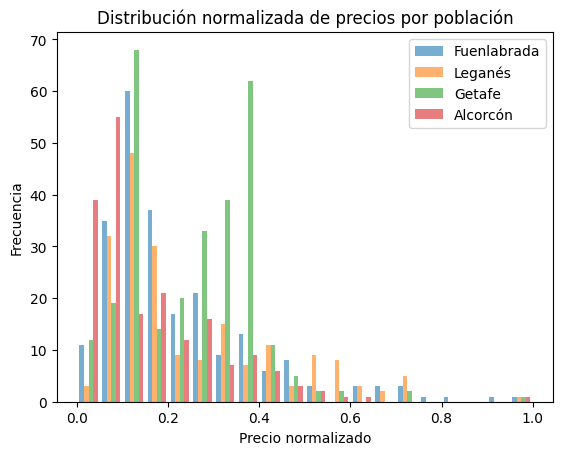

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

ds = pd.read_csv('assets/real_estate.csv', sep=';')
sur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
df_sur = ds[ds['level5'].isin(sur)].copy()
precio_raw = df_sur['price'].astype(str)
precio_num = (precio_raw.str.extract(r'([\d\.,]+)', expand=False)
                         .str.replace('.', '', regex=False)
                         .str.replace(',', '.', regex=False))
df_sur['price_num'] = pd.to_numeric(precio_num, errors='coerce')
df_sur = df_sur.dropna(subset=['price_num'])
norm_vals = []
labels = []
for p in sur:
    vals = df_sur.loc[df_sur['level5'] == p, 'price_num']
    if len(vals) == 0:
        continue
    v = (vals - vals.min()) / (vals.max() - vals.min())
    norm_vals.append(v)
    labels.append(p)
plt.hist(norm_vals, bins=20, label=labels, alpha=0.6)
plt.title('Distribución normalizada de precios por población')
plt.xlabel('Precio normalizado')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

In [20]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
sur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
df_sur = ds[ds['level5'].isin(sur)]
precio_raw = df_sur['price'].astype(str)
precio_num = (precio_raw.str.extract(r'([\d\.,]+)', expand=False)
                         .str.replace('.', '', regex=False)
                         .str.replace(',', '.', regex=False))
df_sur['price_num'] = pd.to_numeric(precio_num, errors='coerce')
sup_raw = df_sur['surface'].astype(str)
sup_num = (sup_raw.str.extract(r'([\d\.,]+)', expand=False)
                     .str.replace('.', '', regex=False)
                     .str.replace(',', '.', regex=False))
df_sur['surface_num'] = pd.to_numeric(sup_num, errors='coerce')
df_sur['pps'] = df_sur['price_num'] / df_sur['surface_num']
for p in ['Getafe', 'Alcorcón']:
    subset = df_sur[df_sur['level5'] == p]
    print(p + ": media pps = " + str(subset['pps'].mean()) + ", mediana pps = " + str(subset['pps'].median()))


Getafe: media pps = 206.6314949251463, mediana pps = 197.33333333333334
Alcorcón: media pps = 223.93024801996188, mediana pps = 220.7792207792208


C:\Users\Mati\AppData\Local\Temp\ipykernel_5304\4051621646.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sur['price_num'] = pd.to_numeric(precio_num, errors='coerce')
C:\Users\Mati\AppData\Local\Temp\ipykernel_5304\4051621646.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sur['surface_num'] = pd.to_numeric(sup_num, errors='coerce')
C:\Users\Mati\AppData\Local\Temp\ipykernel_5304\4051621646.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

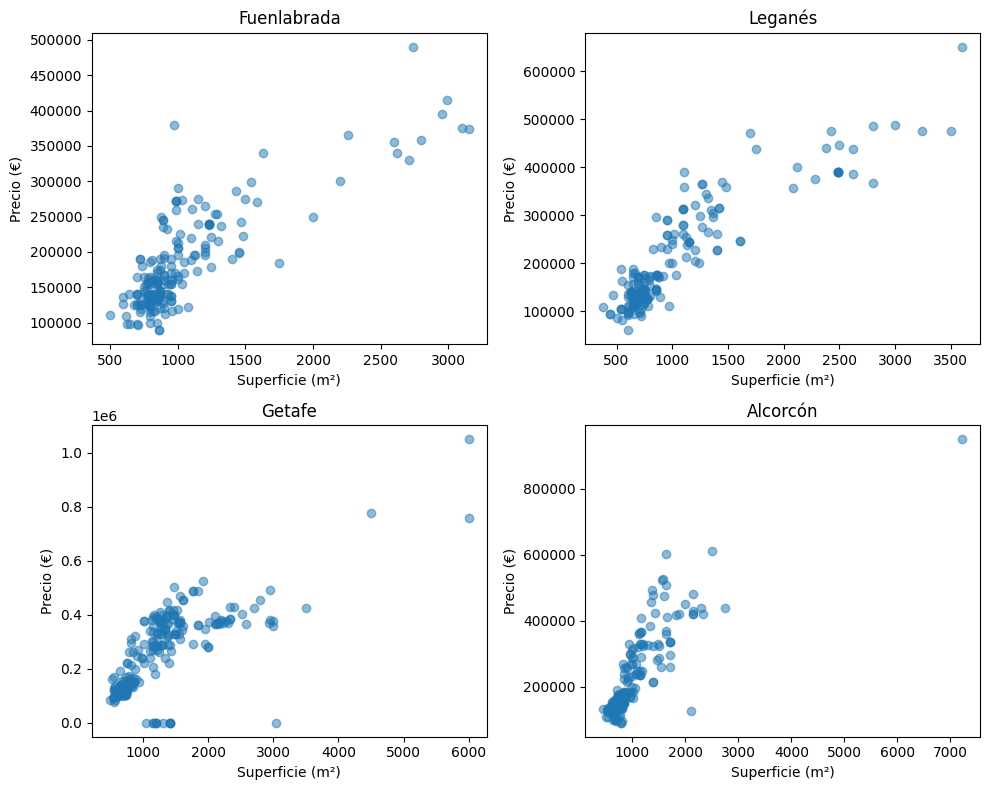

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

ds = pd.read_csv('assets/real_estate.csv', sep=';')
sur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
df_sur = ds[ds['level5'].isin(sur)].copy()
precio_raw = df_sur['price'].astype(str)
precio_num = (precio_raw.str.extract(r'([\d\.,]+)', expand=False)
                         .str.replace('.', '', regex=False)
                         .str.replace(',', '.', regex=False))
df_sur['price_num'] = pd.to_numeric(precio_num, errors='coerce')
sup_raw = df_sur['surface'].astype(str)
sup_num = (sup_raw.str.extract(r'([\d\.,]+)', expand=False)
                     .str.replace('.', '', regex=False)
                     .str.replace(',', '.', regex=False))
df_sur['surface_num'] = pd.to_numeric(sup_num, errors='coerce')

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()
for i, p in enumerate(sur):
    subset = df_sur[df_sur['level5'] == p]
    axes[i].scatter(subset['surface_num'], subset['price_num'], alpha=0.5)
    axes[i].set_title(p)
    axes[i].set_xlabel('Superficie (m²)')
    axes[i].set_ylabel('Precio (€)')
plt.tight_layout()
plt.show()


#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [ ]:
from ipyleaflet import Map, basemaps

# Mapa centrado en Madrid
map = Map(center = (40.35, -3.8), zoom = 11.5, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.OpenStreetMap.Mapnik)
map

Map(center=[40.35, -3.8], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

In [ ]:
import pandas as pd
from ipyleaflet import CircleMarker, LayersControl, Map, basemaps

try:
    map
except NameError:
    map = Map(center=(40.35, -3.8), zoom=11.5, min_zoom=1, max_zoom=20, basemap=basemaps.OpenStreetMap.Mapnik)

ds = pd.read_csv('assets/real_estate.csv', sep=';')
sur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
df = ds[ds['level5'].isin(sur)].copy()

lat_col = next(c for c in ['latitude', 'lat', 'Lat', 'LAT'] if c in df.columns)
lon_col = next(c for c in ['longitude', 'lon', 'lng', 'Long', 'LONG'] if c in df.columns)
df[lat_col] = pd.to_numeric(df[lat_col], errors='coerce')
df[lon_col] = pd.to_numeric(df[lon_col], errors='coerce')
df



,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,NaN,NaN,NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
85,86,153152077,False,sinergical inmobiliaria,NaN,https://www.fotocasa.es/es/comprar/vivienda/le...,1.0,1.0,50.0,107000,...,0,0,0,0,0,1,NaN,NaN,NaN,NaN
94,95,153995577,False,viviendas365com,911226014.0,https://www.fotocasa.es/es/comprar/vivienda/le...,3.0,2.0,120.0,320000,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
109,110,153586414,False,area uno asesores inmobiliarios,912664081.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,3.0,142.0,425000,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,15276,153903887,False,aliseda servicios de gestion inmobiliaria,911368198.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,1.0,78.0,138000,...,0,0,0,0,0,1,NaN,NaN,NaN,NaN
15291,15292,151697757,False,unipiso,912788631.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,2.0,110.0,279000,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
15305,15306,153902389,False,jadein ferrero,914871639.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,85.0,170000,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
15322,15323,153871864,False,gestion comercial,911220662.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,91.0,112000,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
